# Maverik Time Series Forecasting Analysis- EDA

<a class="anchor" id="TableofContents"></a>
## Table of Contents
* [1. Introduction - Business Statement](#1.IntroductionBusinessStatement)  
* [2. Exploratory Data Analysis](#2.ExploratoryDataAnalysis)
* [3. Merging both dataframes](#3.Mergingbothdataframes)
* [4. Feature Engineering](#4.FeatureEngineering)


<a class="anchor" id="1.IntroductionBusinessStatement"></a>
# 1. Introduction - Business Statement

Maverik is currently facing a significant challenge in preparing comprehensive ROI documents for their new store openings. This challenge stems from the difficulty of accurately predicting first-year sales, which in turn hinders the company's strategic financial planning and decision-making processes, ultimately affecting their sustainable growth. To address this issue, the primary analytical goal is to develop a predictive model capable of providing precise daily forecasts for merchandise sales, food sales, unleaded fuel sales, and diesel fuel sales for new Maverik stores during their first year of operation.


<a class="anchor" id="2.ExploratoryDataAnalysis"></a>
# 2. Exploratory Data Analysis

In this section, we provide an overview of the Exploratory Data Analysis carried out as an integral part of the project. Following that, we delve into the Modeling phase, where we assess different models to identify the most suitable one for our future predictions.
This section also encompasses strategies for data preparation, which involves managing variable transformations, conducting feature engineering, and addressing missing values in the dataset.

<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.1. Importing Packages

In [1]:
#pip install xgboost

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from pandas.plotting import table
import plotly.express as px
import matplotlib.ticker as mtick

In [41]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2.2. Reading Data

In [43]:
q_data= pd.read_csv("qualitative_data_msba.csv")
t_data=pd.read_csv("time_series_data_msba.csv")

## 2.3. Summarizing & Understading the Data

In [44]:
q_data.head()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [45]:
t_data.head()

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.4 Removing 1st column from both the dataframes named 'Unnamed: 0'

In [46]:
q_data= q_data.drop("Unnamed: 0", axis=1)
t_data= t_data.drop("Unnamed: 0", axis=1)

In [47]:
q_data.head()

,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2021,5046,2,2,39,No,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,2021,5046,2,2,35,Yes,Yes,Yes,Yes,No,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,2021,5046,2,2,36,No,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,2021,5046,2,2,25,Yes,Yes,Yes,No,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [48]:
t_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.5 Checking the shape of both the dataframes

In [49]:
q_data.shape

(37, 54)

In [50]:
t_data.shape

(13908, 11)

<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.6 Obtaining description of the data in the datafame

In [51]:
q_data[['square_feet','x1_mile_pop','x1_mile_emp','x1_mile_income','x1_2_mile_pop','x1_2_mile_emp']].describe()

,square_feet,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp
count,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,4970.27027,6703.567568,4757.648649,53300.378378,1833.108108,1514.135135
std,575.93121,5694.011350,4697.168291,24333.027254,1915.140476,2489.423094
min,2933.00000,0.000000,56.000000,0.000000,0.000000,31.000000
25%,5046.00000,1984.000000,1771.000000,39538.000000,262.000000,386.000000
50%,5046.00000,5574.000000,3895.000000,46356.000000,1003.000000,1037.000000
75%,5046.00000,11269.000000,6002.000000,73519.000000,2686.000000,1616.000000
max,6134.00000,18692.000000,26077.000000,110957.000000,5923.000000,15403.000000


In [52]:
t_data[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].describe()


,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded
count,13908.000000,13908.000000,13908.000000,13908.000000
mean,2846.537988,759.922326,1702.585227,2382.091588
std,981.299870,341.578220,2161.208192,1025.518658
min,0.000000,0.000000,0.000000,240.180500
25%,2181.156250,521.087875,383.062750,1654.149000
50%,2693.976250,697.434500,1018.920000,2256.677500
75%,3325.306250,924.282625,2283.297625,2928.254000
max,7172.466000,2531.662000,20853.952000,8077.233500


<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.7. Identified Zero Variance Variables
The following columns exhibit consistent values throughout and do not demonstrate significant correlation with the target variables. Therefore, they can be considered as zero variance variables and may be removed from the dataset:
 1. front_door_count
 2. godfather_s_pizza
 3. diesel
 4. car_wash
 5. ev_charging
 6. non_24_hour
 7. self_check_out

In [53]:
q_data.drop(['front_door_count','godfather_s_pizza','car_wash','ev_charging','non_24_hour','self_check_out','diesel'], axis=1,inplace=True)

<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.8 Checking the shape of q_data after columns drop

In [54]:
q_data.shape

(37, 47)

<a class="anchor" id="2.1.ImportingPackages"></a>
## 2.9. Finding NA and Categorical Values  in Qualitative Dataframe (q_data)

In [55]:
na_values = q_data.isna().sum()
na_values[na_values > 0]

rv_lanes_layout                14
rv_lanes_stack_type            14
hi_flow_lanes_layout           15
hi_flow_lanes_stack_type       15
hi_flow_rv_lanes_layout        14
hi_flow_rv_lanes_stack_type    14
dtype: int64

As per the above result, 6 columns of qualitative dataframe has N/A value. It means that Maverik does not provide these features in few of it stores.

In [56]:
cat_col= q_data.select_dtypes(include="object").columns.tolist()
cat_col

['lottery',
 'freal',
 'bonfire_grill',
 'pizza',
 'cinnabon',
 'ethanol_free',
 'hi_flow_lanes',
 'rv_lanes',
 'hi_flow_rv_lanes',
 'def',
 'cat_scales',
 'rv_dumps',
 'propane',
 'traditional_forecourt_layout',
 'traditional_forecourt_stack_type',
 'rv_lanes_layout',
 'rv_lanes_stack_type',
 'hi_flow_lanes_layout',
 'hi_flow_lanes_stack_type',
 'hi_flow_rv_lanes_layout',
 'hi_flow_rv_lanes_stack_type']

## 2.10. Replacing NA values with None

In [57]:
columns_with_na = q_data.columns[q_data.isna().any()].tolist()

for column in columns_with_na:
    mode_value = q_data[column].mode()[0]
    q_data[column].fillna("None", inplace=True)

## 2.11 Factorizing the Categorical columns

In [58]:
for column in cat_col:
    q_data[column] = pd.factorize(q_data[column])[0]

In [59]:
import pandas as pd

# Define bins and labels
bins = [20, 30, 40, 50]
labels = [1, 2, 3]

# Bin the values in the 'parking_spaces' column
q_data['parking_spaces'] = pd.cut(q_data['parking_spaces'], bins=bins, labels=labels, include_lowest=True).astype(int)

In [60]:
q_data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,ethanol_free,...,hi_flow_lanes_stack_type,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,2021,5046,2,2,0,0,0,0,0,0,...,0,4,6,0,0,2,2,6,2,21560
1,2021,5046,2,2,1,0,0,1,0,1,...,0,9,4,1,0,5,5,10,4,21980
2,2021,5046,2,2,0,0,0,1,0,0,...,1,0,5,2,1,3,2,4,1,22015
3,2021,5046,2,2,1,0,0,1,0,0,...,0,5,4,1,0,3,3,6,2,22085
4,2021,5046,2,1,0,0,0,0,0,1,...,1,0,0,3,1,0,0,0,0,22120


## 2.12. Finding NA and Categorical Values in Time Series Dataframe (t_data)

In [61]:
na_values = t_data.isna().sum()
na_values[na_values > 0]

Series([], dtype: int64)

There are no columns in time series data that has N/A value

## 2.13.Extracting Year, Month and Date from Calendar_day_date

In [62]:
t_data['calendar.calendar_day_date'] = pd.to_datetime(t_data['calendar.calendar_day_date'])

t_data['calendar_year'] = t_data['calendar.calendar_day_date'].dt.year
t_data['calendar_month'] = t_data['calendar.calendar_day_date'].dt.month
t_data['calendar_day'] = t_data['calendar.calendar_day_date'].dt.day

In [63]:
t_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,calendar_year,calendar_month,calendar_day
0,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535,2022,6,17
1,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535,2022,6,22
2,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535,2022,6,23
3,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535,2022,6,26
4,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535,2022,6,27


## 2.14. Analysis On Qualitative and Time Series Data

### Analysing the 4 target variables(In-Store, Food, Diesel, Unleaded)

#### Plotting diesel and unleaded sales on Days of the week for the year 2021,2022 and 2023

In [64]:
t_data['calendar.calendar_day_date'] = pd.to_datetime(t_data['calendar.calendar_day_date'])

t_data.set_index('calendar.calendar_day_date', inplace=True)

#### Sales of all target variables based on Calender Week

In [65]:
t_data['calendar.fiscal_week_id_for_year'].min(), t_data['calendar.fiscal_week_id_for_year'].max()

(1, 52)

In [66]:
df_time_aggregate = t_data.groupby('calendar.fiscal_week_id_for_year')['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded'].sum().reset_index()

Lets check if we have more than one sales data for a date

In [67]:
temp = t_data.groupby('calendar.fiscal_week_id_for_year')['daily_yoy_ndt.total_inside_sales'].size()
temp[temp > 1].sort_values(ascending=False)

calendar.fiscal_week_id_for_year
20    273
38    270
13    270
33    270
28    270
24    270
21    270
49    270
45    270
19    269
11    268
46    268
39    268
32    268
31    268
30    268
29    268
4     268
2     268
26    268
25    268
5     268
42    268
50    268
18    268
15    268
9     268
41    266
48    266
37    266
43    266
44    266
51    266
40    266
47    266
1     266
27    266
36    266
35    266
34    266
23    266
22    266
17    266
16    266
14    266
12    266
10    266
8     266
7     266
6     266
3     266
52    266
Name: daily_yoy_ndt.total_inside_sales, dtype: int64

##### Indexing with Time Series Data

In [68]:
df_time_aggregate = df_time_aggregate.set_index('calendar.fiscal_week_id_for_year')
df_time_aggregate.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52],
           dtype='int64', name='calendar.fiscal_week_id_for_year')

<Figure size 2880x3600 with 0 Axes>

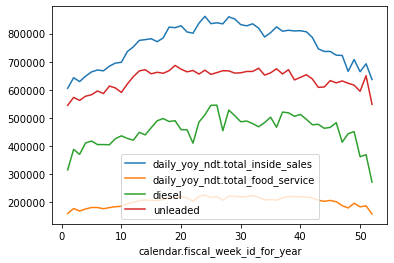

In [69]:
plt.figure(figsize=(40, 50));
df_time_aggregate.plot();

#### Identifying Sale of Diesel and Unleaded during Weekend and Weekdays of the years 2021, 2022, 2023

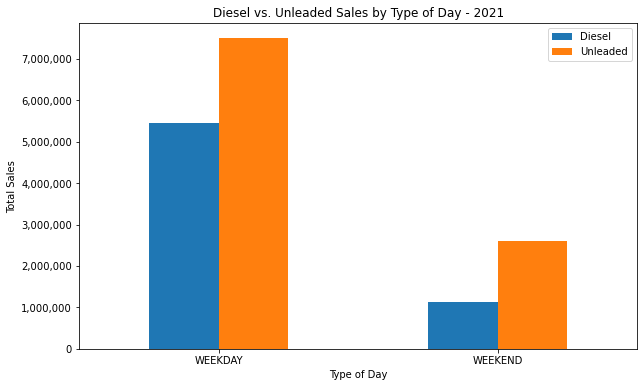

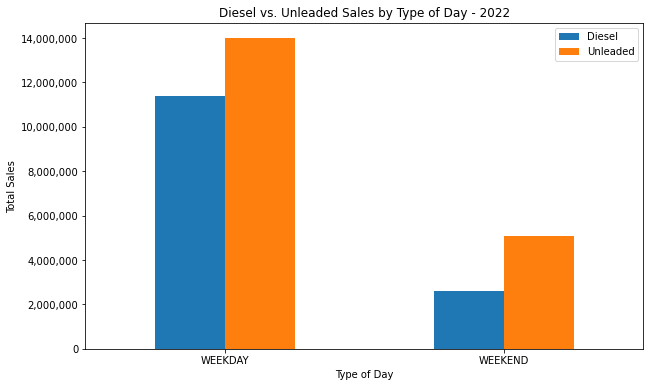

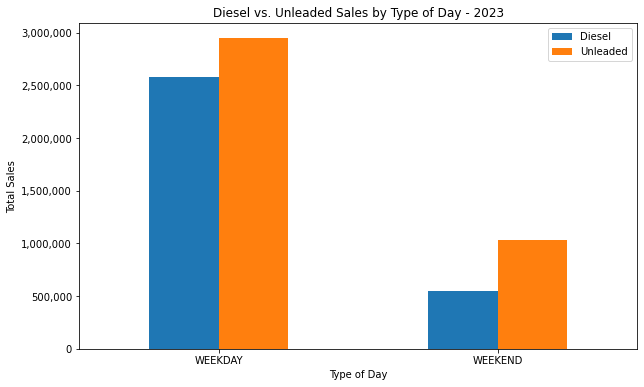

In [70]:
for year in [2021, 2022, 2023]:
    sales_year = t_data[t_data['calendar_year'] == year]
    pivot_table = sales_year.pivot_table(index='calendar_information.type_of_day',
                                         values=['diesel', 'unleaded'],
                                         aggfunc='sum')
    ax = pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Diesel vs. Unleaded Sales by Type of Day - {year}')
    plt.xlabel('Type of Day')
    plt.ylabel('Total Sales')
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xticklabels(pivot_table.index, rotation=0)

    plt.legend(['Diesel', 'Unleaded'])
    plt.show()

#### Identifying Sale of Merchandise and Food during Weekend and Weekdays for the years 2021,2022,2023

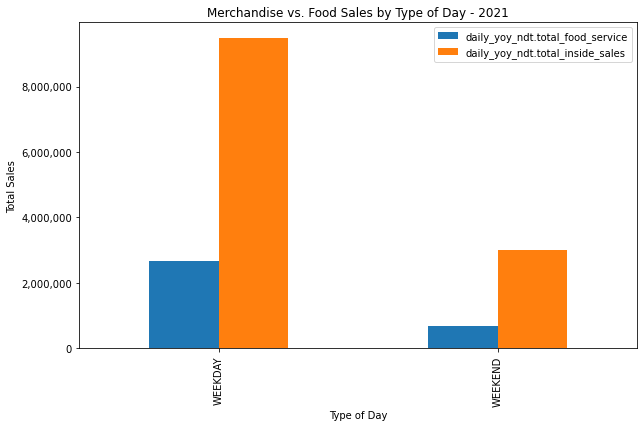

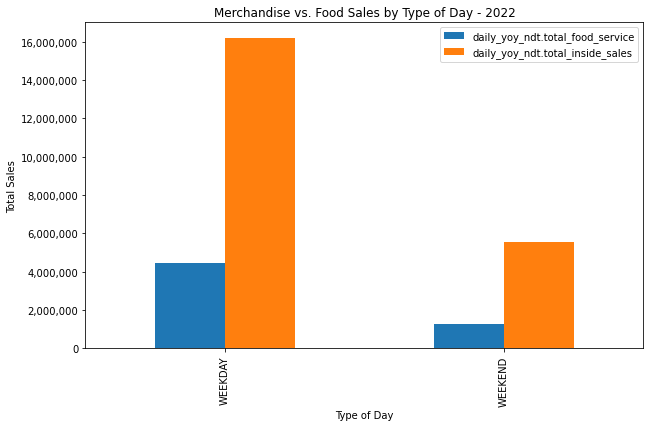

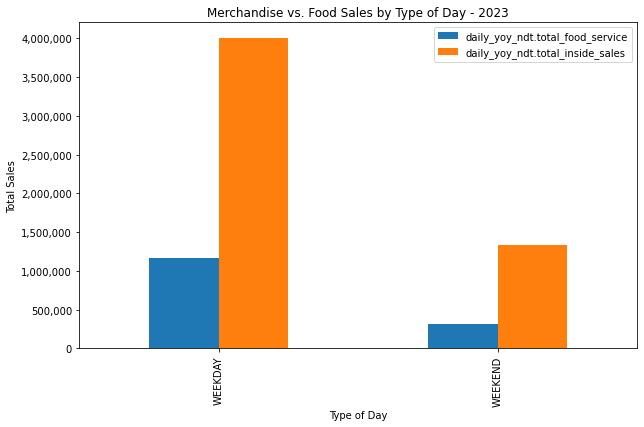

In [71]:
for year in [2021, 2022, 2023]:
    sales_year = t_data[t_data['calendar_year'] == year]
    pivot_table = sales_year.pivot_table(index='calendar_information.type_of_day',
                                         values=['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service'],
                                         aggfunc='sum')
    ax = pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Merchandise vs. Food Sales by Type of Day - {year}')
    plt.xlabel('Type of Day')
    plt.ylabel('Total Sales')
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Plotting In Store and food sales of Maverik store during each month of the year 2021,2022 and 2023

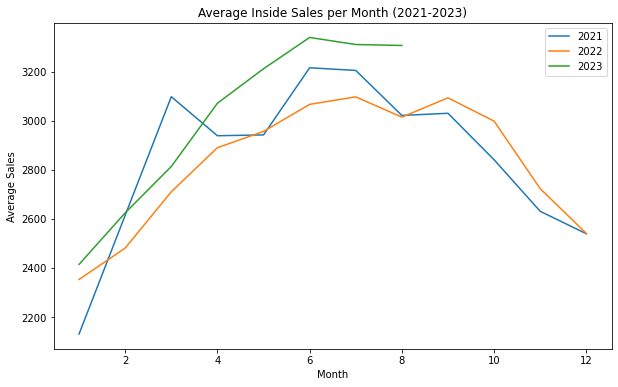

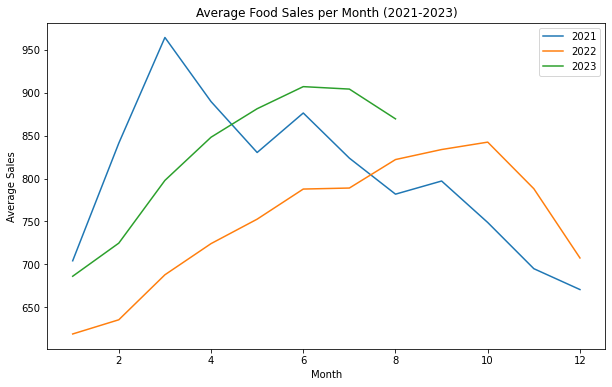

In [89]:
average_sales_2021 = t_data_2021.groupby('calendar_month')['daily_yoy_ndt.total_inside_sales'].mean()
average_sales_2022 = t_data_2022.groupby('calendar_month')['daily_yoy_ndt.total_inside_sales'].mean()
average_sales_2023 = t_data_2023.groupby('calendar_month')['daily_yoy_ndt.total_inside_sales'].mean()
months = range(1,13)
months_2023 = range(1, 9)

plt.figure(figsize=(10, 6))

plt.plot(months, average_sales_2021, label='2021')
plt.plot(months, average_sales_2022, label='2022')
plt.plot(months_2023, average_sales_2023, label='2023')

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Inside Sales per Month (2021-2023)')
plt.legend()
plt.show()



average_sales_2021 = t_data_2021.groupby('calendar_month')['daily_yoy_ndt.total_food_service'].mean()
average_sales_2022 = t_data_2022.groupby('calendar_month')['daily_yoy_ndt.total_food_service'].mean()
average_sales_2023 = t_data_2023.groupby('calendar_month')['daily_yoy_ndt.total_food_service'].mean()

months_2023 = range(1, 9)

plt.figure(figsize=(10, 6))

plt.plot(months, average_sales_2021, label='2021')
plt.plot(months, average_sales_2022, label='2022')
plt.plot(months_2023, average_sales_2023, label='2023')

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Food Sales per Month (2021-2023)')
plt.legend()
plt.show()



From the graphs depicted above, we can observe that the sale of in-store and food items increase during the end of Spring and whole summer season, it starts dipping during the end of Fall with the minimum sales observed during the last month of the year. We can roughly predict that this year sales are going to dip after Fall.

#### Plotting Diesel and Unleaded sales of Maverik store during each month of the year 2021,2022 and 2023

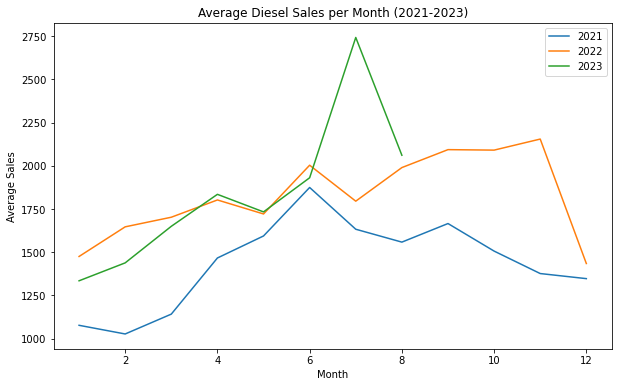

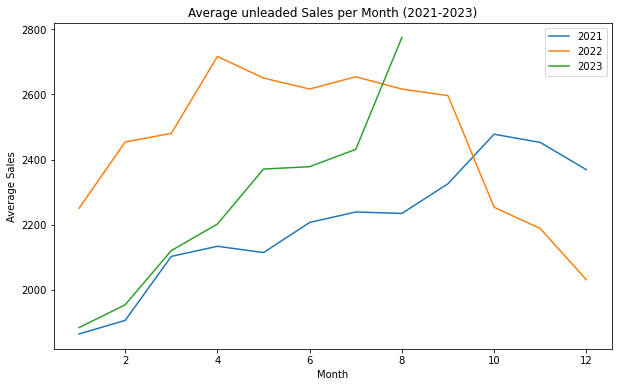

In [90]:
average_sales_2021 = t_data_2021.groupby('calendar_month')['diesel'].mean()
average_sales_2022 = t_data_2022.groupby('calendar_month')['diesel'].mean()
average_sales_2023 = t_data_2023.groupby('calendar_month')['diesel'].mean()

months_2023 = range(1, 9)

plt.figure(figsize=(10, 6))

plt.plot(months, average_sales_2021, label='2021')
plt.plot(months, average_sales_2022, label='2022')
plt.plot(months_2023, average_sales_2023, label='2023')

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Diesel Sales per Month (2021-2023)')
plt.legend()
plt.show()



average_sales_2021 = t_data_2021.groupby('calendar_month')['unleaded'].mean()
average_sales_2022 = t_data_2022.groupby('calendar_month')['unleaded'].mean()
average_sales_2023 = t_data_2023.groupby('calendar_month')['unleaded'].mean()

months_2023 = range(1, 9)

plt.figure(figsize=(10, 6))

plt.plot(months, average_sales_2021, label='2021')
plt.plot(months, average_sales_2022, label='2022')
plt.plot(months_2023, average_sales_2023, label='2023')

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average unleaded Sales per Month (2021-2023)')
plt.legend()
plt.show()

We can see that year 2023 has the higher average sales of  unleaded during July and August compared to the previous years whereas Diesel observed a good rise till July 2023 but there was a sudden dip in its average sales during August 2023.

<a class="anchor" id="3.Mergingbothdataframes"></a>
# 3. Merging both dataframes

In [92]:
df_merged=pd.merge(t_data,q_data, on='site_id_msba', how='left')

In [93]:
df_merged.shape

(13908, 60)

In [94]:
df_merged.head()

,capital_projects.soft_opening_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,...,hi_flow_lanes_layout,hi_flow_lanes_stack_type,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count
0,2022-06-14,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,2.0
1,2022-06-14,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,2.0
2,2022-06-14,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,2.0
3,2022-06-14,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,2.0
4,2022-06-14,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,2.0


### Relation between customer population and income

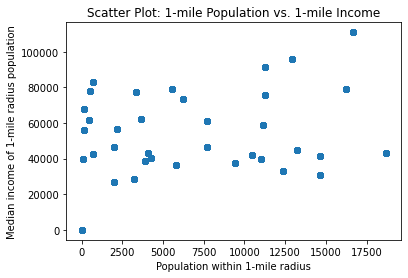

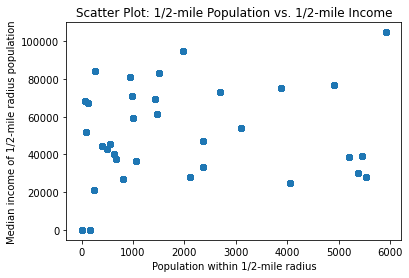

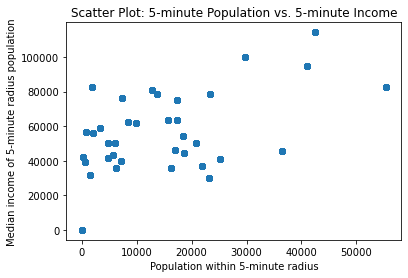

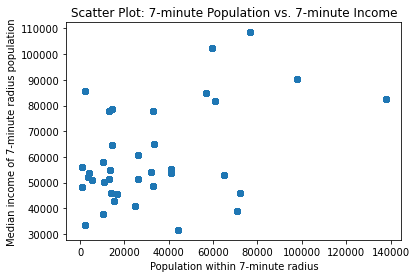

In [95]:
plt.scatter(df_merged['x1_mile_pop'], df_merged['x1_mile_income'])
plt.xlabel('Population within 1-mile radius')
plt.ylabel('Median income of 1-mile radius population')
plt.title('Scatter Plot: 1-mile Population vs. 1-mile Income')
plt.show()

plt.scatter(df_merged['x1_2_mile_pop'], df_merged['x1_2_mile_income'])
plt.xlabel('Population within 1/2-mile radius')
plt.ylabel('Median income of 1/2-mile radius population')
plt.title('Scatter Plot: 1/2-mile Population vs. 1/2-mile Income')
plt.show()

plt.scatter(df_merged['x5_min_pop'], df_merged['x5_min_inc'])
plt.xlabel('Population within 5-minute radius')
plt.ylabel('Median income of 5-minute radius population')
plt.title('Scatter Plot: 5-minute Population vs. 5-minute Income')
plt.show()

plt.scatter(df_merged['x7_min_pop'], df_merged['x7_min_inc'])
plt.xlabel('Population within 7-minute radius')
plt.ylabel('Median income of 7-minute radius population')
plt.title('Scatter Plot: 7-minute Population vs. 7-minute Income')
plt.show()



### Population in Miles vs Total Sales

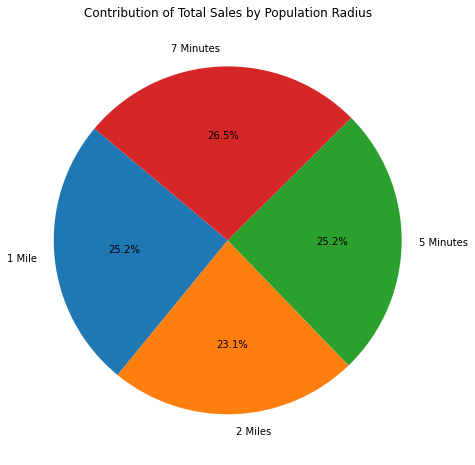

In [96]:
df_merged['total_sales'] = df_merged['daily_yoy_ndt.total_food_service'] + df_merged['daily_yoy_ndt.total_inside_sales']
total_sales_1_mile = df_merged[df_merged['x1_mile_pop'] > 0]['total_sales'].sum()
total_sales_2_mile = df_merged[df_merged['x1_2_mile_pop'] > 0]['total_sales'].sum()
total_sales_5_min = df_merged[df_merged['x5_min_pop'] > 0]['total_sales'].sum()
total_sales_7_min = df_merged[df_merged['x7_min_pop'] > 0]['total_sales'].sum()


labels = ['1 Mile', '2 Miles', '5 Minutes', '7 Minutes']
values = [total_sales_1_mile, total_sales_2_mile, total_sales_5_min, total_sales_7_min]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Total Sales by Population Radius')
plt.show()


#### Distribution of Sales based on Stores that Sell  "freal," "bonfire_grill," "pizza," and "cinnabon"

In [ ]:
sells_items = df_merged[(df_merged['freal'] > 0) | (df_merged['bonfire_grill'] > 0) | (df_merged['pizza'] > 0) | (df_merged['cinnabon'] > 0)]
does_not_sell_items = df_merged[(df_merged['freal'] == 0) & (df_merged['bonfire_grill'] == 0) & (df_merged['pizza'] == 0) & (df_merged['cinnabon'] == 0)]


avg_food_service_sells_items = sells_items['daily_yoy_ndt.total_food_service'].mean()
avg_food_service_does_not_sell_items = does_not_sell_items['daily_yoy_ndt.total_food_service'].mean()

store_type_counts = [len(sells_items), len(does_not_sell_items)]
labels = ['Sells Items', 'Does Not Sell Items']
plt.figure(figsize=(8, 6))
plt.pie(store_type_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Store Types')
plt.show()

We can see that 70.3% of the food sales come from stores that sell food items and 29.7% from those that do not sell food items

#### Comparing Sale of Diesel and Unleaded based on Fuel Station Features

In [ ]:
columns_to_visualize = ['cat_scales', 'propane', 'traditional_forecourt_fueling_positions',
                        'traditional_forecourt_layout', 'traditional_forecourt_stack_type',
                        'hi_flow_rv_lanes_layout', 'hi_flow_rv_lanes_stack_type']

for column in columns_to_visualize:

    sales_by_column = df_merged.groupby(column)[['diesel', 'unleaded']].sum()
    sales_by_column.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Sales of Diesel and Unleaded by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.xticks(rotation=0)
    plt.legend(['Diesel', 'Unleaded'])
    plt.show()

#### Comparing Sale of Diesel based on Fuel Station Features

In [ ]:
numerical_columns = ['hi_flow_lanes', 'hi_flow_rv_lanes', 'def',
                     'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_layout',
                     'hi_flow_lanes_stack_type', 'diesel']

subset_df = df_merged[numerical_columns]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We observe that sale of diesel increases if there is an increase in the number of hi flow lanes fueling positions.

#### Comparing Sale of Unleaded based on Fuel Station Features

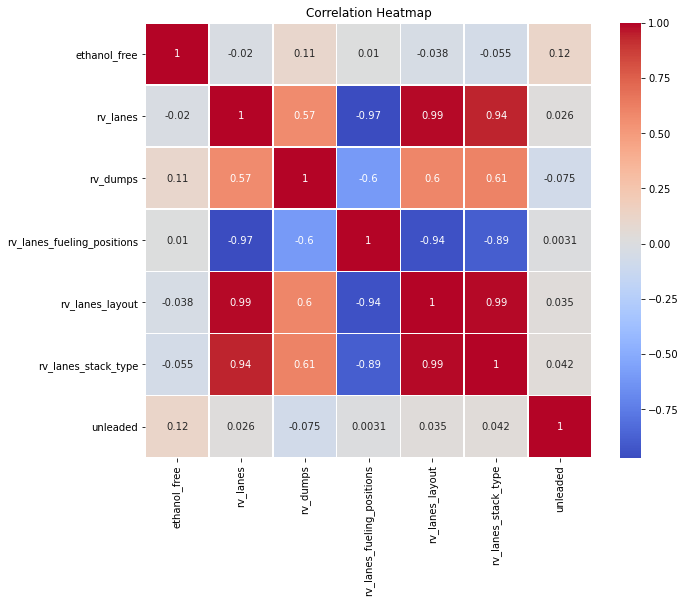

In [83]:
numerical_columns =  [ 'ethanol_free', 'rv_lanes', 'rv_dumps',
                        'rv_lanes_fueling_positions', 'rv_lanes_layout',
                        'rv_lanes_stack_type', 'unleaded']

subset_df = df_merged[numerical_columns]


correlation_matrix = subset_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As reflected in the heat map, all the predictors except  rv_dumps has a mild positive correlation where an increase in one unit of the value will lead to the increase in sale of unleaded

#### Dropping the columns not required during Modeling Phase

In [84]:
columns_to_drop = ['x1_mile_income_bin', 'x1_2_mile_income_bin', 'x5_min_inc_bin', 'x7_min_inc_bin']
df_merged = df_merged.drop(columns=columns_to_drop)

<a class="anchor" id="4.FeatureEngineering"></a>
# 4. Feature Engineering

In [85]:
df_merged['calendar.calendar_day_date'] = t_data.index

In [86]:
df_merged.set_index('calendar.calendar_day_date', inplace=True)

#### 6.1 One Hot Encoding

In [87]:
# Identifying categorical columns
categorical_columns = df_merged.select_dtypes(include=['object']).columns

# Applying one-hot encoding to categorical columns
encoded_df = pd.get_dummies(df_merged, columns=categorical_columns)

In [88]:
encoded_df.head()

,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,calendar_year,calendar_month,calendar_day,open_year,...,calendar_information.holiday_Saint Valentine's Day,calendar_information.holiday_Thanksgiving Day,calendar_information.holiday_Veteran's Day,calendar_information.holiday_Washington's Birthday,calendar_information.type_of_day_WEEKDAY,calendar_information.type_of_day_WEEKEND,season_Fall,season_Spring,season_Summer,season_Winter
calendar.calendar_day_date,,,,,,,,,,,,,,,,,,,,,
2022-06-17,25,2168.2920,861.6930,722.7745,1425.1020,24535,2022,6,17,2022.0,...,0,0,0,0,1,0,0,0,1,0
2022-06-22,25,2051.5635,808.0275,730.4850,1436.2740,24535,2022,6,22,2022.0,...,0,0,0,0,1,0,0,0,1,0
2022-06-23,25,2257.5000,966.4410,895.7970,1594.3725,24535,2022,6,23,2022.0,...,0,0,0,0,1,0,0,0,1,0
2022-06-26,26,1520.5925,542.3250,584.2900,1124.9280,24535,2022,6,26,2022.0,...,0,0,0,0,0,1,0,0,1,0
2022-06-27,26,1897.6930,771.4525,852.2605,1640.2540,24535,2022,6,27,2022.0,...,0,0,0,0,1,0,0,0,1,0


'encoded_df' now contains the original columns along with one-hot encoded categorical columns